## known data:

In [3]:
from scipy.stats import beta
import numpy as np
from calc_prob import calc_prob_between

#This is the known data: impressions and conversions for the Control and Test set
imps_ctrl,convs_ctrl=16500, 30 
imps_test, convs_test=17000, 50

## reate the Beta functions for the two sets

In [9]:
#here we create the Beta functions for the two sets

# control beta 
a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
beta_C = beta(a_C, b_C)

# test beta 
a_T, b_T = convs_test+1, imps_test-convs_test+1
beta_T = beta(a_T, b_T)

## calculating the probability for Test to be better than Control

In [14]:
#calculating the lift
lift=(beta_T.mean()-beta_C.mean())/beta_C.mean()

#calculating the probability for Test to be better than Control
prob=calc_prob_between(beta_T, beta_C)

print (f"Test option lift Conversion Rates by {lift*100:2.2f}% with {prob*100:2.1f}% probability.")

Test option lift Conversion Rates by 59.68% with 98.2% probability.


## plots the Beta distribution

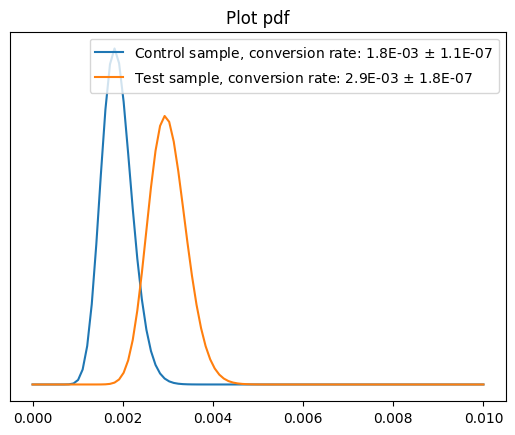

In [16]:
import matplotlib.pyplot as plt

def calc_beta_mode(a, b):
    '''this function calculate the mode (peak) of the Beta distribution'''
    return (a-1)/(a+b-2)

def plot(betas, names, linf=0, lsup=0.01):
    '''this function plots the Beta distribution'''
    x=np.linspace(linf,lsup, 100)
    for f, name in zip(betas, names) :
        y=f.pdf(x)            #this for calculate the value for the PDF at the specified x-points
        y_mode=calc_beta_mode(f.args[0], f.args[1])
        y_var=f.var()         # the variance of the Beta distribution
        plt.plot(x,y, label=f"{name} sample, conversion rate: {y_mode:0.1E} $\pm$ {y_var:0.1E}")
        plt.yticks([])
    plt.legend()
    plt.title('Plot pdf')
    plt.show()

plot([beta_C, beta_T], names=["Control", "Test"])

## More Data !

imps:  100


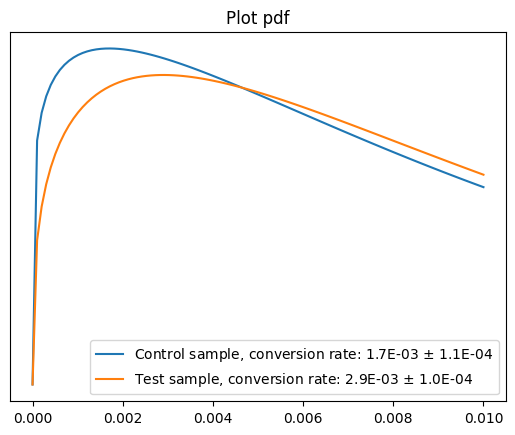

imps:  1100


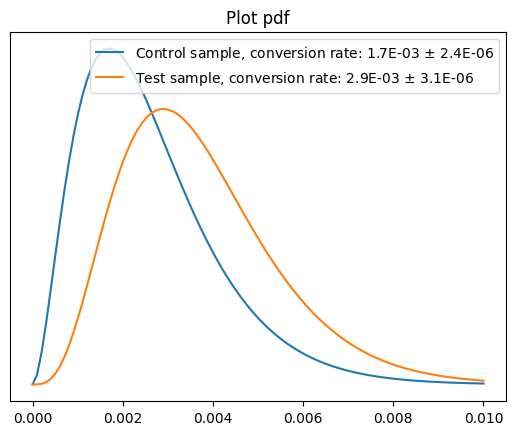

imps:  2100


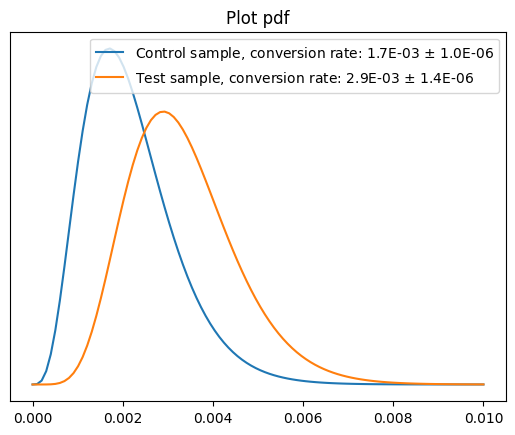

imps:  3100


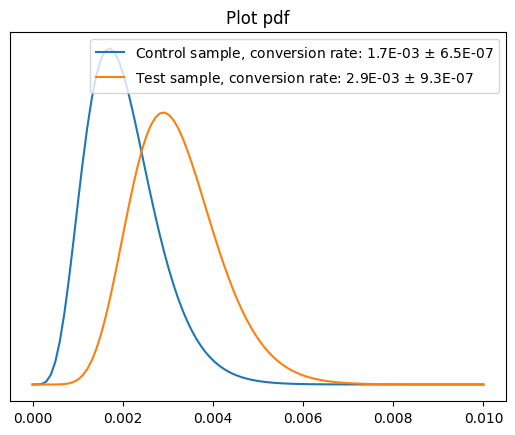

imps:  4100


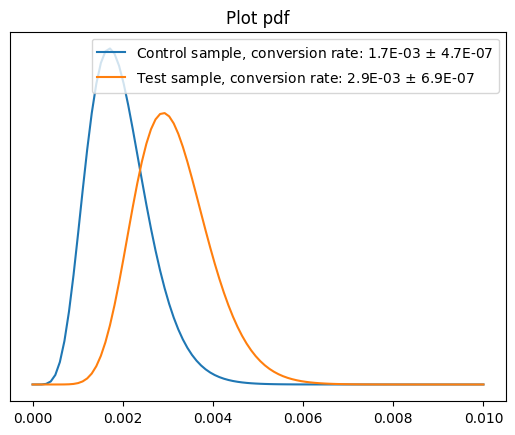

imps:  5100


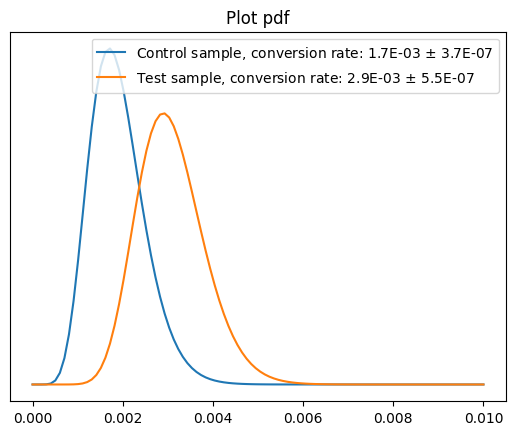

imps:  6100


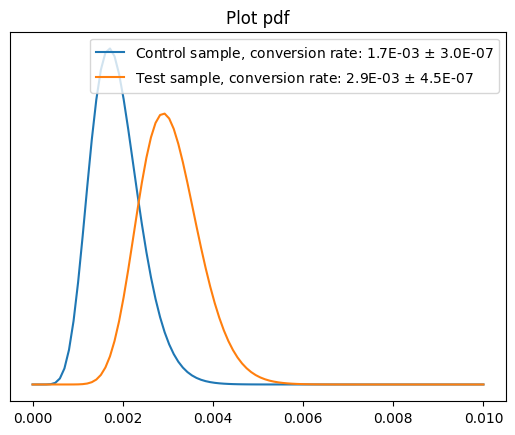

imps:  7100


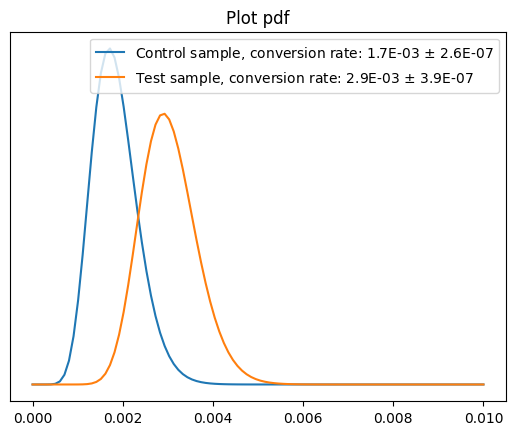

imps:  8100


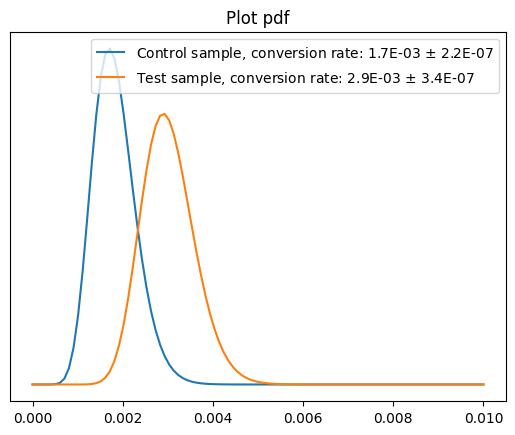

imps:  9100


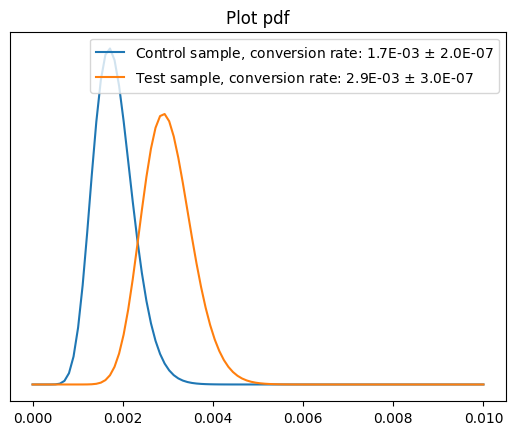

In [33]:
for i in range(1,100,10):
    print('imps: ',100*i)
    imps_ctrl,convs_ctrl=100*i, 0.0017*100*i
    imps_test, convs_test=110*i, 0.0029*110*i
    
    # control beta 
    a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
    beta_C = beta(a_C, b_C)

    # test beta 
    a_T, b_T = convs_test+1, imps_test-convs_test+1
    beta_T = beta(a_T, b_T)
        
    plot([beta_C, beta_T], names=["Control", "Test"])